In [1]:
import sys
import os
import matplotlib.pyplot as plt
import torch

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from models.unet.unet import UNet
from src.models.data_management.cnn_formes import CNNFormes
from src.data_processing.dataset_loader import CoastData
from src.models.metrics import Metrics

from src.models.data_management.data_loader import DataLoaderManager

import cv2

c:\Users\josep\.conda\envs\imagine\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


# UNet

In [6]:
artifact_path = os.path.abspath(os.path.join(os.getcwd(), "../../artifacts/"))

# Load the data to split it and save it to a dict
model = UNet(num_classes=1, experiment_name="test_experiments", use_mlflow=False)

model.load_model(os.path.abspath(os.path.join(artifact_path, "2025-05-06-11-26-35_binary_unet/models/best_model.pth")))

data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_shoreline"))

coast_data = CoastData(data_path)
split = coast_data.split_data()

data = DataLoaderManager.load_data(split)

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57


In [7]:
import numpy as np
split = "test"

all_probs_unet = []
all_masks_unet = []

for img_path, mask_path in zip(data[split]["images"], data[split]["masks"]):
    pred = model.predict_patch(img_path, combination="max", raw_output=True)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # print(np.unique(mask, return_counts=True))
    all_probs_unet.append(pred.cpu().ravel().numpy())
    all_masks_unet.append(mask.ravel())
    
    # break

# Attention UNet

In [ ]:
from models.attention_unet.attention_unet import Attention_UNet

artifact_path = os.path.abspath(os.path.join(os.getcwd(), "../../artifacts/"))

# Load the data to split it and save it to a dict
model = Attention_UNet(num_classes=1, experiment_name="test_experiments", use_mlflow=False)

model.load_model(os.path.abspath(os.path.join(artifact_path, "2025-03-24-10-58-30_binary_attention/models/best_model.pth")))

data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_shoreline"))

coast_data = CoastData(data_path)
split = coast_data.split_data()

data = DataLoaderManager.load_data(split)

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57


In [9]:
split = "test"

all_probs_attention_unet = []
all_masks_attention_unet = []

for img_path, mask_path in zip(data[split]["images"], data[split]["masks"]):
    pred = model.predict_patch(img_path, combination="max", raw_output=True)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # print(np.unique(mask, return_counts=True))
    all_probs_attention_unet.append(pred.cpu().ravel().numpy())
    all_masks_attention_unet.append(mask.ravel())

# DUCK-Net

In [2]:
from models.duck_net.duck_net import DuckNet

artifact_path = os.path.abspath(os.path.join(os.getcwd(), "../../artifacts/"))

# Load the data to split it and save it to a dict
model = DuckNet(num_classes=1, experiment_name="test_experiments", use_mlflow=False)

model.load_model(os.path.abspath(os.path.join(artifact_path, "2025-06-12-10-00-04_binary_ducknet/models/best_model.pth")))

data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_shoreline"))

coast_data = CoastData(data_path)
split = coast_data.split_data()

data = DataLoaderManager.load_data(split)

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57


In [3]:
split = "test"

all_probs_duck_net = []
all_masks_duck_net = []

for img_path, mask_path in zip(data[split]["images"], data[split]["masks"]):
    pred = model.predict_patch(img_path, combination="max", raw_output=True)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # print(np.unique(mask, return_counts=True))
    all_probs_duck_net.append(pred.cpu().ravel().numpy())
    all_masks_duck_net.append(mask.ravel())

# DeepLabV3

In [10]:
from models.deeplab.deeplab import DeepLabV3

artifact_path = os.path.abspath(os.path.join(os.getcwd(), "../../artifacts/"))

# Load the data to split it and save it to a dict
model = DeepLabV3(num_classes=1, experiment_name="test_experiments", use_mlflow=False)

model.load_model(os.path.abspath(os.path.join(artifact_path, "2025-03-21-16-10-53_binary_deeplabv3/models/best_model.pth")))

data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_shoreline"))

coast_data = CoastData(data_path)
split = coast_data.split_data()

data = DataLoaderManager.load_data(split)

Using cache found in C:\Users\josep/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\josep\.conda\envs\imagine\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\josep\.conda\envs\imagine\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57


In [11]:
split = "test"

all_probs_deeplab = []
all_masks_deeplab = []

for img_path, mask_path in zip(data[split]["images"], data[split]["masks"]):
    pred = model.predict_patch(img_path, combination="max", raw_output=True)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # print(np.unique(mask, return_counts=True))
    all_probs_deeplab.append(pred.cpu().ravel().numpy())
    all_masks_deeplab.append(mask.ravel())

Best F1 for DUCK-Net: 0.2113 at threshold 0.1360


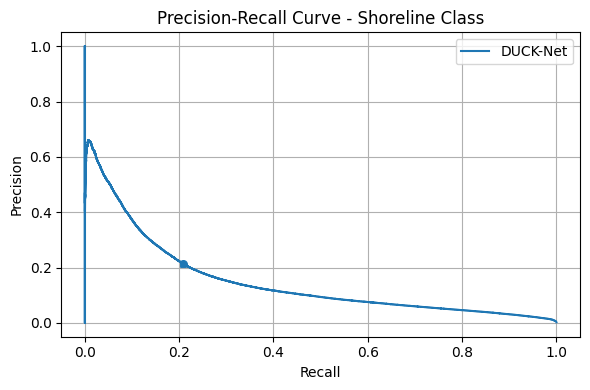

<Figure size 640x480 with 0 Axes>

In [5]:
#temp

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Concatenar totes les màscares i prediccions (de llistes) i aplanar-les
y_true_flat = np.concatenate(all_masks_duck_net).flatten()
y_pred_ducknet = np.concatenate(all_probs_duck_net).flatten()


# # Flattenem GT i prediccions
# y_true_flat = all_masks_unet.flatten()

model_preds = {
    'DUCK-Net': y_pred_ducknet
}

plt.figure(figsize=(6, 4))

for name, y_pred_flat in model_preds.items():
    precision, recall, thresholds = precision_recall_curve(y_true_flat, y_pred_flat)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_idx = np.argmax(f1_scores)
    best_f1 = f1_scores[best_idx]
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else thresholds[-1]

    print(f"Best F1 for {name}: {best_f1:.4f} at threshold {best_threshold:.4f}")

    # Corba
    plt.plot(recall, precision, label=name)
    # Punt òptim (sense text)
    plt.scatter(recall[best_idx], precision[best_idx], s=30)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Shoreline Class")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig(os.path.join(artifact_path, "precision_recall_curve_shoreline_one_class.png"), dpi=300)


Best F1 for U-Net: 0.1537 at threshold 0.9496
Best F1 for Attention U-Net: 0.1531 at threshold 0.9654
Best F1 for DUCK-Net: 0.2113 at threshold 0.1360
Best F1 for DeepLabv3: 0.1739 at threshold 0.9733


C:\Users\josep\AppData\Local\Temp\ipykernel_21132\631812904.py:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\josep\.conda\envs\imagine\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


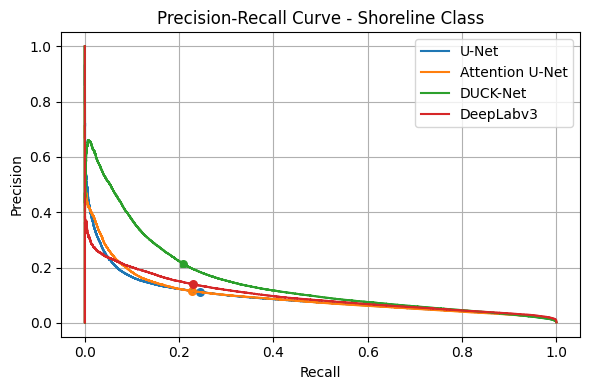

<Figure size 640x480 with 0 Axes>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Concatenar totes les màscares i prediccions (de llistes) i aplanar-les
y_true_flat = np.concatenate(all_masks_unet).flatten()
y_pred_unet = np.concatenate(all_probs_unet).flatten()
y_pred_attunet = np.concatenate(all_probs_attention_unet).flatten()
y_pred_ducknet = np.concatenate(all_probs_duck_net).flatten()
y_pred_deeplab = np.concatenate(all_probs_deeplab).flatten()


# # Flattenem GT i prediccions
# y_true_flat = all_masks_unet.flatten()

model_preds = {
    'U-Net': y_pred_unet,
    'Attention U-Net': y_pred_attunet,
    'DUCK-Net': y_pred_ducknet,
    'DeepLabv3': y_pred_deeplab,
}

plt.figure(figsize=(6, 4))

for name, y_pred_flat in model_preds.items():
    precision, recall, thresholds = precision_recall_curve(y_true_flat, y_pred_flat)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_idx = np.argmax(f1_scores)
    best_f1 = f1_scores[best_idx]
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else thresholds[-1]

    print(f"Best F1 for {name}: {best_f1:.4f} at threshold {best_threshold:.4f}")

    # Corba
    plt.plot(recall, precision, label=name)
    # Punt òptim (sense text)
    plt.scatter(recall[best_idx], precision[best_idx], s=30)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Shoreline Class")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig(os.path.join(artifact_path, "precision_recall_curve_shoreline_one_class.png"), dpi=300)
